## Dataset Cleaning & Preprocessing

In [87]:
import pandas as pd
from ast import literal_eval
import os
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('midi_dataframe.csv', parse_dates=[11])

# Cleaning
df.drop_duplicates(subset='file_name', inplace=True)
df.dropna(subset=['tgdb_genres'], inplace=True)
categories_filter = df.console.isin(['Medleys', 'Piano Only'])
remix_filter = df.title.str.contains('[Rr]emix')

df = df[~categories_filter & ~remix_filter]
df_stripped = df.copy()
df_stripped.title = df.title.str.replace('\(\d+\)', '').str.rstrip()
df_stripped['rank'] = df.title.str.extract('\((\d+)\)', expand=False)
df = df_stripped.sort_values(by='rank', ascending=False).groupby(['brand', 'console', 'game', 'title']).first().reset_index()
df.set_index('file_name', inplace=True)

In [3]:
num_games = len(df.groupby(['tgdb_platform', 'tgdb_gametitle']))
print('There is %d midi files, from %d games, with %d midis matched with tgdb'
      %(len(df),
        num_games,
        (df.tgdb_gametitle.notnull().sum())))
df_features = pd.read_csv('features.csv').set_index('file_name')
print("There is %d midi files with computed features"%(len(df_features)))

print("After removing not valid midi files, we have %d files"%(len(df.join(df_features, how='inner'))))

There is 22179 midi files, from 3243 games, with 22179 midis matched with tgdb
There is 31483 midi files with computed features
After removing not valid midi files, we have 22005 files


In [4]:
df_genres = df.tgdb_genres.map(literal_eval, 'ignore').apply(pd.Series).stack().reset_index(level=1, drop=True).reset_index().set_index('file_name')
df_genres.columns = ['genre']

In [69]:
df_pred = df_genres.join(df_features, how='inner')
df_pred['genre'] = df_pred['genre'].apply(lambda x : x.replace("Simulator", "Sim.").replace("Simulation", "Sim.").\
             replace("Construction and Management", "C&M"))
df_pred.head()

,genre,Prevalence_of_Most_Common_Pitch,Prevalence_of_Most_Common_Pitch_Class,Relative_Prevalence_of_Top_Pitches,Relative_Prevalence_of_Top_Pitch_Classes,Interval_Between_Most_Prevalent_Pitches,Interval_Between_Most_Prevalent_Pitch_Classes,Number_of_Common_Pitches,Pitch_Variety,Pitch_Class_Variety,...,Parallel_Motion,Similar_Motion,Contrary_Motion,Oblique_Motion,Parallel_Fifths,Parallel_Octaves,Dynamic_Range,Variation_of_Dynamics,Variation_of_Dynamics_In_Each_Voice,Average_Note_to_Note_Change_in_Dynamics
file_name,,,,,,,,,,,,,,,,,,,,,
0004cc74bde3bc82f44afb5f566187c3dbcea9b2.mid,Platform,0.1593,0.2242,0.7222,0.7500,5.0,5.0,2.0,28.0,12.0,...,0.0000,0.0,0.0000,0.00000,0.0,0.0,63.0,17.65,6.3240,13.7800
0005d95e4aed74b84826f6090fcc8e52bceb5cb3.mid,Action,0.1316,0.2368,0.6000,0.7037,5.0,7.0,1.0,20.0,8.0,...,0.6522,0.0,0.2609,0.08696,0.0,0.0,47.0,19.18,0.8643,0.3128
0005d95e4aed74b84826f6090fcc8e52bceb5cb3.mid,Adventure,0.1316,0.2368,0.6000,0.7037,5.0,7.0,1.0,20.0,8.0,...,0.6522,0.0,0.2609,0.08696,0.0,0.0,47.0,19.18,0.8643,0.3128
0005d95e4aed74b84826f6090fcc8e52bceb5cb3.mid,Sports,0.1316,0.2368,0.6000,0.7037,5.0,7.0,1.0,20.0,8.0,...,0.6522,0.0,0.2609,0.08696,0.0,0.0,47.0,19.18,0.8643,0.3128
0005d95e4aed74b84826f6090fcc8e52bceb5cb3.mid,Strategy,0.1316,0.2368,0.6000,0.7037,5.0,7.0,1.0,20.0,8.0,...,0.6522,0.0,0.2609,0.08696,0.0,0.0,47.0,19.18,0.8643,0.3128


## Feature Exploration & Analysis

In [92]:
#For all analysis according to genre, we obviously need to group all the features per midi to a genre :
groupby_genre = df_pred[~(df_pred['genre'] == 'Vehicle Sim.')].groupby(by='genre')
#We drop one category, the "Vehicle Simulation" genre, since only one Midi track has this genre.
groupby_stats = groupby_genre.describe()#[['Duration','Major_or_Minor']]#[['count', 'mean', 'std']]
games_genre = list(groupby_stats.index)
groupby_stats['Duration']

,count,mean,std,min,25%,50%,75%,max
genre,,,,,,,,
Action,8441.0,106.390382,85.483802,0.8000,49.8700,92.15,144.0000,1365.0
Adventure,4793.0,108.267443,85.564151,1.1670,52.1500,90.26,144.0000,1126.0
C&M Sim.,70.0,102.709786,81.242347,4.2500,50.2275,81.11,127.7000,376.6
Fighting,1846.0,113.830364,77.009804,1.2960,58.1900,104.00,158.9000,586.4
Flight Sim.,84.0,115.422738,91.944208,4.1740,51.7050,89.72,166.3750,365.4
Horror,154.0,120.115429,82.636837,2.6000,64.7750,104.15,157.6000,458.3
Life Sim.,191.0,101.997660,116.483678,2.0080,41.3750,85.63,124.6000,1380.0
MMO,75.0,164.762667,80.992115,28.5700,110.5000,152.70,226.7500,395.8
Music,100.0,98.118100,65.782772,5.8120,82.7900,90.00,98.9625,561.3


### 1. Major Or Minor

In [90]:
## Let's test a very simple feature analysis of major and minor tonality among genres.
def countMinMaj(x):
    col_of_interest = x['Major_or_Minor']
    majCount = 0
    minCount = 0
    for v in col_of_interest:
        if int(v) == 0:
            #from the documentation of the features, 
            majCount += 1
        else:
            minCount += 1
    return majCount, minCount


print('\033[1m' + "Percentage of Major pieces over all Midis per genre" + '\033[0m')
groupby_genre.apply(countMinMaj).apply(lambda x: 100*(x[0]/(x[0]+x[1])))

Percentage of Major pieces over all Midis per genre


genre
Action           98.767918
Adventure        98.476946
C&M Sim.        100.000000
Fighting         97.508126
Flight Sim.     100.000000
Horror           98.701299
Life Sim.       100.000000
MMO              85.333333
Music            99.000000
Platform         98.517331
Puzzle           97.704254
Racing           99.630996
Role-Playing     98.136266
Sandbox          98.734177
Shooter          99.330357
Sports           98.037467
Stealth         100.000000
Strategy         97.351598
dtype: float64

Those results seems to indicate that for all genres, the vast majority of the pieces are in Major, which is a surprising results to find. However, the feature description in the jSymbolic documentation states the following : 

"_
Whether the piece is major or minor, as indicated by the first encountered major/minor metadata tag in the piece. Set to 0 if the metadata indicates that the piece is major, or set to 1 if the metadata indicates that it is minor. Defaults to 0 if the key signature is unknown._"

Thus, jSymbolic decides on the tonality of the piece according to only the metadata of the MIDI file. Considering the dataset is user-contributed, it is defintely likely that not all user provided a tonality for their song encoding, and since jSymbolic default the encoding of unknown key signature to Major, we obtain this apparently skewed distribution toward Major keys. This is definitely some kind of critic that could be emitted about jSymbolic's design choices, why not assign another integer in the case of unknown key? Although it would possible to count all pieces with unkown key, without using jSymbolic, it is computationally too expensive with the current tools.

In conclusion, this feature cannot be interpreted to explain some kind of pattern of key according to the genre (i.e., we cannot use this feature for our research question)

### 2. Duration

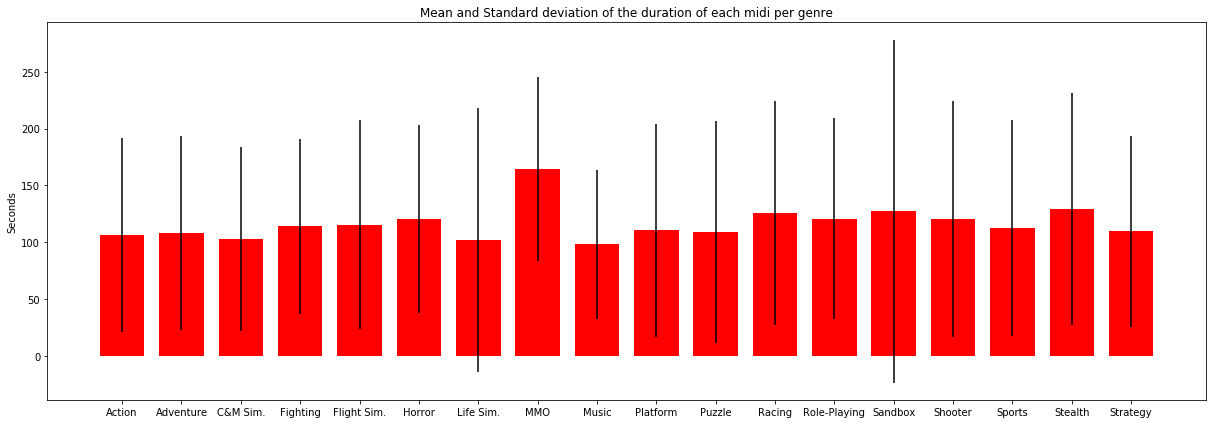

In [105]:
dyn_df = groupby_stats['Duration']    
ind = np.arange(len(dyn_df))
fig, ax = plt.subplots()
width = 0.75
rects_dur = ax.bar(ind, dyn_df['mean'], width, color='r', yerr=dyn_df['std'])
ax.boxplot
    
#ax.legend(rects_dur, ('Duration'))
ax.set_xticks(ind)
ax.set_xticklabels(games_genre)

ax.set_title('Mean and Standard deviation of the duration of each midi per genre')
ax.set_ylabel('Seconds')
fig.set_size_inches((17,6))
plt.tight_layout()
plt.show()

All genres seem to have

### 3. Pitch Registers 

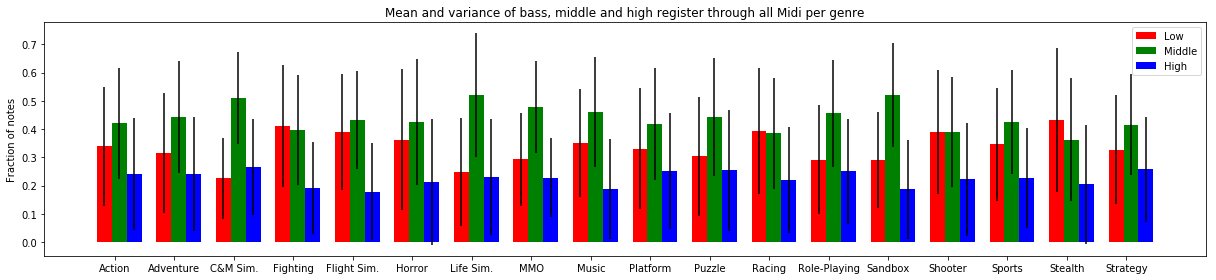

In [86]:
#Dynamic range distribution according to genre :
hi = "Importance_of_High_Register"
mid = "Importance_of_Middle_Register"
lo = "Importance_of_Bass_Register"

dyn_df = groupby_stats[[hi, mid, lo]]    
ind = np.arange(len(dyn_df))
fig, ax = plt.subplots()
width = 0.25
rects_lo = ax.bar(ind, dyn_df[lo]['mean'], width, color='r', yerr=dyn_df[lo]['std'])
rects_mi = ax.bar(ind+width, dyn_df[mid]['mean'], width, color='g', yerr=dyn_df[mid]['std'])
rects_hi = ax.bar(ind+2*width, dyn_df[hi]['mean'], width, color='b', yerr=dyn_df[hi]['std'])
    
ax.legend((rects_lo[0], rects_mi[0], rects_hi[0]), ('Low', 'Middle', 'High'))
ax.set_xticks(ind + (width+0.1) / 2)
ax.set_xticklabels(games_genre)

ax.set_title('Mean and variance of bass, middle and high register through all Midi per genre')
ax.set_ylabel('Fraction of notes')
fig.set_size_inches((17,4))
plt.tight_layout()
plt.show()


The feature of Bass/Middle/High register is simply the fraction of all notes of a certain Midi Pitch range over the total number of notes. jSymbolic mapped the three registers this way : 
* Bass => [0, 54] 
* Middle => [55, 72] 
* High => [73, 128]

As we can see, there is a pretty huge variance for all values of frequency register, which indicates that there does not seems to have some kind of  

### 